### Sesion_2_Carga_Datos_Desde_Ficheros

1. **Ficheros csv**

In [4]:
import csv  #cargamos librería
import pandas as pd

df = pd.read_csv('subvenciones.csv', encoding='latin1')

# Mostrar las primeras filas
display(df.head())   # Muestra las 5 primeras

# Mostrar las columnas disponibles
print("Columnas del dataset:")
display(df.columns)

with open('subvenciones.csv', encoding='latin1') as fichero_csv:
    lector = csv.reader(fichero_csv)
    next(lector, None)  # Se salta la cabecera irque el primero es el nombre de las columnas 
    importe_total = 0
    for linea in lector:
        importe_str = linea[2]
        importe = float(importe_str)
        importe_total = importe_total + importe
    print("Importe total de Subvenciones: ", importe_total)  


,Asociación,Actividad Subvencionada,Importe
0,AMPA ANTONIO MACHADO,TALLER FIESTA DE CARNAVAL,94.56
1,AMPA ANTONIO MACHADO,TALLER DIA DEL PADRE,39.04
2,AMPA ANTONIO MACHADO,TALLER DIA DE LA MADRE,43.64
3,AMPA ANTONIO MACHADO,FIESTA FIN DE CURSO,921.00
4,AMPA ANTONIO MACHADO,CONCURSO LOGOTIPO AMPA,56.57


Columnas del dataset:


Index(['Asociación', 'Actividad Subvencionada ', 'Importe'], dtype='object')

Importe total de Subvenciones:  66487.94


<span style="color:red">**Ejercicio**</span>. Calcula la Media de las subvenciones. Ayuda cargar los importes en un array. 

In [5]:
#Solución aquí. , TIPO EXMAEN 
import pandas as pd
import numpy as np

#cargar el CSV en un data frame
data_frame = pd.read_csv('subvenciones.csv', encoding='latin1')
'''
# las primeras filas para asegurarnos de que se carg bien
print("Primeras filas del dataset:")
display(data_frame.head())

# vemos las columnas que tiene el archivo
print("Columnas disponibles:", list(data_frame.columns))

# Convertimos la columna 'Importe' a números (por si hay texto o símbolos €)
data_frame['Importe'] = pd.to_numeric(data_frame['Importe'], errors='coerce')

# Calculamos la media
media_importes = data_frame['Importe'].mean()

print(f"La media de las subvenciones es: {media_importes:.2f} €")
'''
data_frame = pd.read_csv('subvenciones.csv', encoding='latin1')  #recogemos valores y los almacenamos
importe_array = data_frame['Importe'].astype(float) #pasamos a float los datos de la columna Importe
media = round(np.mean(importe_array), 2)
print("Media de importes: ", media)






Media de importes:  348.1


Añadimos un nuevo campo ¿qué hace el código?

In [3]:

# Abrimos el archivo original (lectura) y creamos uno nuevo (escritura)
with open('subvenciones.csv', encoding='latin1') as fich_lect, open('subvenciones_esc.csv', 'w', encoding='latin1') as fich_escr:
    # Leemos el archivo original como diccionario (cada fila tiene claves: Asociación, Importe, etc.)
    dict_lector = csv.DictReader(fich_lect)
    # Creamos una lista con los nombres de las columnas originales + dos nuevas columnas
    campos = dict_lector.fieldnames + ['Requiere comprobación', 'Justificación recibida']
    # Preparamos un escritor de CSV con las columnas nuevas    
    escritor = csv.DictWriter(fich_escr, fieldnames=campos)
    # Escribimos la primera línea del nuevo CSV (los nombres de las columnas)
    escritor.writeheader()
        # Recorremos cada fila del archivo original
    for linea in dict_lector:
                # Convertimos el valor de "Importe" a número para poder comparar
        if float(linea['Importe']) > 500:
            linea['Requiere comprobación'] = "Sí"
             # Si el importe es mayor que 500 €, marcar como "Sí" en la columna nueva
        else:
            linea['Requiere comprobación'] = "No"
        linea['Justificación recibida'] = "No"
        escritor.writerow(linea)
 # Mostrar en la consola
        #print(f'Asociación: {linea["Asociación"]}, Importe: {linea["Importe"]}, Requiere comprobación: {linea["Requiere comprobación"]}, Justificación recibida: {linea["Justificación recibida"]}')
df = pd.read_csv('subvenciones_esc.csv', encoding='latin1')

# Mostrar las primeras filas
display(df.head(10))   # Muestra las 10 primeras
     
# ¿qué hace el código?



,Asociación,Actividad Subvencionada,Importe,Requiere comprobación,Justificación recibida
0,AMPA ANTONIO MACHADO,TALLER FIESTA DE CARNAVAL,94.56,No,No
1,AMPA ANTONIO MACHADO,TALLER DIA DEL PADRE,39.04,No,No
2,AMPA ANTONIO MACHADO,TALLER DIA DE LA MADRE,43.64,No,No
3,AMPA ANTONIO MACHADO,FIESTA FIN DE CURSO,921.00,Sí,No
4,AMPA ANTONIO MACHADO,CONCURSO LOGOTIPO AMPA,56.57,No,No
5,AMPA ANTONIO MACHADO,ASOCIACION FAPA ALCOBENDAS,80.00,No,No
6,AMPA ANTONIO MACHADO,ASOCIACION FAPA GINER DE LOS RIOS,86.79,No,No
7,AMPA ANTONIO MACHADO,FIESTA DE NAVIDAD,660.00,Sí,No
8,AMPA ANTONIO MACHADO,HALLOWEEN,168.39,No,No
9,AMPA ANTONIO MACHADO,SAN ISIDRO,195.00,No,No


También podemos trabajar con pandas de otra manera

2. **Ficheros xls**

Usa librerías **xlrd** y **xlwt**. A lo mejor hay que instalarlas.

In [4]:
from xlrd import open_workbook, colname
import xlwt
import pandas as pd
with open_workbook('subvenciones.xls',on_demand=True) as libro:
    asociaciones = {} #Creamos un diccionario vacío
    for nombre in libro.sheet_names():  
    # 🔹 Recorremos cada hoja del archivo Excel (por si el libro tiene varias pestañas)

        hoja = libro.sheet_by_name(nombre)
        for i in range(1,hoja.nrows):
            fila = hoja.row(i)
            centro = fila[0].value
            subvencion = fila[2].value
            #print(fila[0].ctype)
            #print(fila[2].value)
            if centro in asociaciones:
                asociaciones[centro] = asociaciones[centro] + subvencion
            else:
                asociaciones[centro] = subvencion
    # Imprimir el resultado en cada iteración
    for centro, acumulado in asociaciones.items():
         print(f"Centro: {centro}, Subvención acumulada: {acumulado} €")

    #print(asociaciones)
df = pd.read_csv('subvenciones.csv', encoding='latin1')

# Mostrar las primeras filas
display(df.head())   # Muestra las 5 primeras


Centro: AMPA ANTONIO MACHADO, Subvención acumulada: 2344.99 €
Centro: AMPA BACHILLER ALONSO LOPEZ, Subvención acumulada: 3200.0 €
Centro: AMPA CASTILLA, Subvención acumulada: 2604.44 €
Centro: AMPA DAOIZ Y VELARDE, Subvención acumulada: 3152.74 €
Centro: AMPA EMILIO CASADO, Subvención acumulada: 3015.67 €
Centro: AMPA FEDERICO GARCIA LORCA, Subvención acumulada: 1919.06 €
Centro: AMPA GABRIEL Y GALAN, Subvención acumulada: 2741.51 €
Centro: AMPA LUIS BUÑUEL, Subvención acumulada: 2081.0 €
Centro: AMPA MIGUEL HERNANDEZ, Subvención acumulada: 2923.35 €
Centro: AMPA MIRAFLORES, Subvención acumulada: 2787.21 €
Centro: AMPA PARQUE CATALUÑA, Subvención acumulada: 2604.44 €
Centro: AMPA PROFESOR TIERNO GALVÁN, Subvención acumulada: 1286.0 €
Centro: AMPA SEIS DE DICIEMBRE, Subvención acumulada: 1950.0 €
Centro: AMPA VALDEPALITOS, Subvención acumulada: 3929.5 €
Centro: AMPA LA CHOPERA, Subvención acumulada: 1430.0 €
Centro: AMPA EL CUQUILLO, Subvención acumulada: 1507.83 €
Centro: AMPA VALDELAP

,Asociación,Actividad Subvencionada,Importe
0,AMPA ANTONIO MACHADO,TALLER FIESTA DE CARNAVAL,94.56
1,AMPA ANTONIO MACHADO,TALLER DIA DEL PADRE,39.04
2,AMPA ANTONIO MACHADO,TALLER DIA DE LA MADRE,43.64
3,AMPA ANTONIO MACHADO,FIESTA FIN DE CURSO,921.00
4,AMPA ANTONIO MACHADO,CONCURSO LOGOTIPO AMPA,56.57


<span style="color:red">**Ejercicio**</span>. Calcula la mediana y la moda y redondea a 0 

In [22]:
#Solución aquí
import pandas as pd
import numpy as np
from scipy import stats
import xlrd

df = pd.read_excel("subvenciones.xls")
importe = df['Importe'].astype(float)

 #Cuando usas groupby en pandas, por defecto la columna que estás agrupando se convierte en el índice del nuevo DataFrame.
df_acumulado = df.groupby('Centro', as_index=False).sum()
importe_acumulado = df_acumulado['Importe'].astype(float)

print(f''' 
La mediana es : {round(np.median(importe_acumulado),0)}
La moda es: {round(stats.mode(importe_acumulado, keepdims=True).mode[0],0)}
''')


 
La mediana es : 2465.0
La moda es: 2604.0



In [23]:
import pandas as pd
'''
# Leer el archivo Excel
df = pd.read_excel('subvenciones.xls')
# Crear un nuevo DataFrame para almacenar la acumulación de subvenciones por centro
df_acumulado = pd.DataFrame(columns=['Centro', 'Importe'])

for index, fila in df.iterrows():
    centro = fila['Centro']
    subvencion = fila['Importe']

    # Verificar si el centro ya está en el DataFrame acumulado
    if centro in df_acumulado['Centro'].values:
        # Actualizar la subvención acumulada si el centro ya existe loc agrega una fila
        df_acumulado.loc[df_acumulado['Centro'] == centro, 'Importe'] += subvencion
    else:
        # Agregar una nueva fila si el centro no existe
        df_acumulado.loc[len(df_acumulado)] = [centro, subvencion]
     # Imprimir el resultado en cada iteración
for centro, acumulado in asociaciones.items():
    print(f"Centro: {centro}, Subvención acumulada: {acumulado} €")

# Imprimir el DataFrame acumulado final
#print("\nResultado final:")
display(df_acumulado) 
'''
#modo pandas y no modo juan carlos 
# Leer el Excel
df = pd.read_excel("subvenciones.xls")

# Acumular importes por centro en 1 línea
df_acumulado = df.groupby('Centro', as_index=False)['Importe'].sum()

# Convertimos a float (por si acaso)
importe_acumulado = df_acumulado['Importe'].astype(float)

# Mediana y moda
mediana = round(np.median(importe_acumulado), 0)
moda = round(stats.mode(importe_acumulado, keepdims=True).mode[0], 0)

print(f"Mediana acumulada por centro: {mediana}")
print(f"Moda acumulada por centro: {moda}")

Mediana acumulada por centro: 2465.0
Moda acumulada por centro: 2604.0


<span style="color:red">**Ejercicio**</span>.
¿que hacé el ejercicio anterior? ¿como mostrarías el más alto?

Representa una gráficas de barras los resultados del df_acumulado?


In [7]:
#respuesta aquí

3. **Ficheros json**

In [8]:
import json   #no hace falta importar

with open('subvenciones.json') as fich:
    datos = json.load(fich)
    print(json.dumps(datos[0:2], indent=2))

[
  {
    "Asociaci\u00f3n": "AMPA ANTONIO MACHADO",
    "Actividad Subvencionada": "TALLER FIESTA DE CARNAVAL",
    "Importe en euros": "94.56"
  },
  {
    "Asociaci\u00f3n": "AMPA ANTONIO MACHADO",
    "Actividad Subvencionada": "TALLER DIA DEL PADRE",
    "Importe en euros": "39.04 "
  }
]


JSON FILE muestra una lista o arraay de objetos que pueden a su vez contener listar, separadas 
por {}

In [9]:
import json

with open('subvenciones.json', encoding='utf-8') as fich_lect, \
     open('subvenciones_agrupadas.json', 'w', encoding='utf-8') as fich_escr:
    
    data = json.load(fich_lect)

    asoc_str = "Asociación"
    act_str = "Actividad Subvencionada"
    imp_str = "Importe en euros"

    lista = []
    asociaciones_dict = {}

    # Agrupar actividades por asociación
    for elem in data:
        asoc = elem[asoc_str]
        act = elem[act_str]
        imp = elem[imp_str]

        if asoc not in asociaciones_dict:
            asociaciones_dict[asoc] = []

        asociaciones_dict[asoc].append({
            act_str: act,
            imp_str: imp
        })

    # Convertir a la estructura deseada
    for asoc, actividades in asociaciones_dict.items():
        lista.append({
            "Asociación": asoc,
            "Actividades": actividades
        })

    # Truncar a las primeras 5 asociaciones
    lista_truncada = lista[:5]

    # Mostrar por pantalla
    print(json.dumps(lista_truncada, ensure_ascii=False, indent=4))

    # Guardar en archivo
    json.dump(lista_truncada, fich_escr, ensure_ascii=False, indent=4)


[
    {
        "Asociación": "AMPA ANTONIO MACHADO",
        "Actividades": [
            {
                "Actividad Subvencionada": "TALLER FIESTA DE CARNAVAL",
                "Importe en euros": "94.56"
            },
            {
                "Actividad Subvencionada": "TALLER DIA DEL PADRE",
                "Importe en euros": "39.04 "
            },
            {
                "Actividad Subvencionada": "TALLER DIA DE LA MADRE",
                "Importe en euros": "43.64 "
            },
            {
                "Actividad Subvencionada": "FIESTA FIN DE CURSO",
                "Importe en euros": "921.00 "
            },
            {
                "Actividad Subvencionada": "CONCURSO LOGOTIPO AMPA",
                "Importe en euros": "56.57 "
            },
            {
                "Actividad Subvencionada": "ASOCIACION FAPA ALCOBENDAS",
                "Importe en euros": "80.00 "
            },
            {
                "Actividad Subvencionada": "ASO

Usando Pandas 

In [10]:
import pandas as pd
import json

# Load the JSON data into a pandas DataFrame
df = pd.read_json('subvenciones.json', encoding='utf-8')

# Define column names
asoc_str = "Asociación"
act_str = "Actividad Subvencionada"
imp_str = "Importe en euros"

# Group by association and aggregate activities and amounts
grouped_data = df.groupby(asoc_str).apply(
    lambda group: pd.Series({
        "Asociacion": group.iloc[0][asoc_str],
        "Actividades": group[[act_str, imp_str]].to_dict(orient='records')
    })
)


# Print the generated DataFrame to the console si quiero columna índice uso .reset_index() al final
display(grouped_data.head())

# Convert the DataFrame to a list of dictionaries
output_list = grouped_data.to_dict(orient='records')

# Print the generated JSON content to the console
print(json.dumps(output_list, ensure_ascii=False, indent=4))


# Write the JSON content to the output file
with open('subvenciones_agrupadas.json', 'w', encoding='utf-8') as fich_escr:
    json.dump(output_list, fich_escr, ensure_ascii=False, indent=4)

,Asociacion,Actividades
Asociación,,
AMPA AGORA,AMPA AGORA,[{'Actividad Subvencionada': 'PREMIOS AL RENDI...
AMPA ALDEBARAN,AMPA ALDEBARAN,[{'Actividad Subvencionada': 'PREMIOS AL RENDI...
AMPA ANTONIO MACHADO,AMPA ANTONIO MACHADO,[{'Actividad Subvencionada': 'TALLER FIESTA DE...
AMPA BACHILLER ALONSO LOPEZ,AMPA BACHILLER ALONSO LOPEZ,[{'Actividad Subvencionada': 'MATEMATICAS MANI...
AMPA CASTILLA,AMPA CASTILLA,[{'Actividad Subvencionada': 'CONCURSO TARJETA...


[
    {
        "Asociacion": "AMPA AGORA",
        "Actividades": [
            {
                "Actividad Subvencionada": "PREMIOS AL RENDIMIENTO. SUPERACIÓN Y CONVICENCIA",
                "Importe en euros": "501.67 "
            },
            {
                "Actividad Subvencionada": "ANIMACION A LA LECTURA",
                "Importe en euros": "560.00 "
            },
            {
                "Actividad Subvencionada": "SALIDA AL TEATRO",
                "Importe en euros": "240.00 "
            },
            {
                "Actividad Subvencionada": "EXCURSION CULTURAL VISITA CORRALAS DE MADRID",
                "Importe en euros": "120.00 "
            },
            {
                "Actividad Subvencionada": "CONCURSO FOTOGRAFICO CONSTITUCION",
                "Importe en euros": "160.00 "
            },
            {
                "Actividad Subvencionada": "ACTO DE GRADUACIÓN",
                "Importe en euros": "300.00 "
            },
            {
    

<span style="color:red">**Ejercicio**</span>. Agrupa las cantidades recibidas por asociacion.
    
Ayuda ==>  grouped_df = df.groupby(asoc_str, as_index=False)[imp_str].sum()                  

agrupa groupby  y suma importes  sum()

4. **Ficheros xml**

In [11]:
import xml.etree.ElementTree as ET
# import etree library give us functions to manage xml files
arbol = ET.parse('subvenciones.xml')
asociaciones = {}
#preparamos el diccionario para almacenar lo datos
for fila in arbol.findall('Row'): # iter row para extract information
    centro = fila.find('Asociaci_n').text    #name of the centro
    subvencion = float(fila.find('Importe').text)    #the amount of grant
    if centro in asociaciones:
        asociaciones[centro] = asociaciones[centro] + subvencion #remember is a dictionary
    else:
        asociaciones[centro] = subvencion
for centro, total_subvencion in asociaciones.items():
    print(f'{centro}: {total_subvencion}')

AMPA ANTONIO MACHADO: 2344.99
AMPA BACHILLER ALONSO LOPEZ: 3200.0
AMPA CASTILLA: 2604.44
AMPA DAOIZ Y VELARDE: 3152.74
AMPA EMILIO CASADO: 3015.67
AMPA FEDERICO GARCIA LORCA: 1919.06
AMPA GABRIEL Y GALAN: 2741.51
AMPA LUIS BUÑUEL: 2081.0
AMPA MIGUEL HERNANDEZ: 2923.35
AMPA MIRAFLORES: 2787.21
AMPA PARQUE CATALUÑA: 2604.44
AMPA PROFESOR TIERNO GALVÁN: 1286.0
AMPA SEIS DE DICIEMBRE: 1950.0
AMPA VALDEPALITOS: 3929.5
AMPA LA CHOPERA: 1430.0
AMPA EL CUQUILLO: 1507.83
AMPA VALDELAPARRA: 2465.0
AMPA RIVENDEL: 2200.0
AMPA AGORA: 2421.67
AMPA ALDEBARAN: 3107.05
AMPA GINER DE LOS RIOS: 2058.0
AMPA SEVERO OCHOA: 3563.9700000000003
AMPA VIRGEN DE LA PAZ: 1416.45
AMPA JUAN XXIII: 1781.98
AMPA SAN ANTONIO: 2101.83
AMPA PADRE  MANYANET: 2695.82
AMPA FAPA: 3198.43


Los ficheros XML y JSON son más flexibles que los .xls o los .csv. Imaginemos que quiero agrupar las actividades realizadas por asociación.

In [12]:
arbol = ET.parse('subvenciones.xml')
raiz = arbol.getroot()
nuevo = ET.ElementTree()
raiz_nueva = ET.Element("Raiz")
nuevo._setroot(raiz_nueva)
elem_actual = ET.Element("Asociacion")
asoc_actual = ""
actividades = ET.SubElement(elem_actual, "Actividades")
gasto = 0
for fila in raiz.findall('Row'):
    asoc = fila.find('Asociaci_n').text
    act = fila.find('Actividad_Subvencionada').text
    imp = float(fila.find('Importe').text)
    if asoc_actual != asoc:
        gas_total = ET.SubElement(elem_actual, "Total")
        gas_total.text = str(gasto)
        elem_actual = ET.SubElement(raiz_nueva, "Asociacion")
        elem_actual.set('nombre', asoc)
        actividades = ET.SubElement(elem_actual, "Actividades")
        gasto = 0
    act_elem = ET.SubElement(actividades, "Actividad")
    nom_elem = ET.SubElement(act_elem, "Nombre")
    nom_elem.text = act
    imp_elem = ET.SubElement(act_elem, "Subvencion")
    imp_elem.text = str(imp)
    gasto = gasto + imp
    asoc_actual = asoc
nuevo.write('subvenciones_lista_total.xml')

# Lee el nuevo archivo XML
arbol_nuevo = ET.parse('subvenciones_lista_total.xml')
raiz_nueva = arbol_nuevo.getroot()

# Imprime la estructura del nuevo XML
# Lee el nuevo archivo XML
arbol_nuevo = ET.parse('subvenciones_lista_total.xml')
raiz_nueva = arbol_nuevo.getroot()

# Imprime la estructura del nuevo XML
for asociacion in raiz_nueva.findall('Asociacion'):
    nombre_asociacion = asociacion.get('nombre')
    print(f"Asociación: {nombre_asociacion}")

    for actividad in asociacion.findall('Actividades/Actividad'):
        nombre_actividad = actividad.find('Nombre').text
        subvencion_actividad = actividad.find('Subvencion').text
        print(f"  Actividad: {nombre_actividad}, Subvención: {subvencion_actividad}")

    total_elem = asociacion.find('Total')
    if total_elem is not None:
        total = total_elem.text
        print(f"  Total: {total}\n")
    else:
        print("  Total no disponible\n")

Asociación: AMPA ANTONIO MACHADO
  Actividad: TALLER FIESTA DE CARNAVAL, Subvención: 94.56
  Actividad: TALLER DIA DEL PADRE, Subvención: 39.04
  Actividad: TALLER DIA DE LA MADRE, Subvención: 43.64
  Actividad: FIESTA FIN DE CURSO, Subvención: 921.0
  Actividad: CONCURSO LOGOTIPO AMPA, Subvención: 56.57
  Actividad: ASOCIACION FAPA ALCOBENDAS, Subvención: 80.0
  Actividad: ASOCIACION FAPA GINER DE LOS RIOS, Subvención: 86.79
  Actividad: FIESTA DE NAVIDAD, Subvención: 660.0
  Actividad: HALLOWEEN, Subvención: 168.39
  Actividad: SAN ISIDRO, Subvención: 195.0
  Total: 2344.99

Asociación: AMPA BACHILLER ALONSO LOPEZ
  Actividad: MATEMATICAS MANIPULATIVAS, Subvención: 480.0
  Actividad: PROYECTO DE INGLES, Subvención: 480.0
  Actividad: EXCURSIONES PRIMARIA, Subvención: 928.0
  Actividad: GRADUACIÓN INFANTIL, Subvención: 360.0
  Actividad: GRADUACIÓN 6 PRIM, Subvención: 240.0
  Actividad: REVISTA COLEGIO ENTRETIZAS, Subvención: 220.0
  Actividad: FIESTA INTERCULTURAL, Subvención: 492.0


Con Pandas. 

In [8]:
from lxml import objectify  #lxml library hay que instalarlo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



xml_parseado = objectify.parse('CentrosPontevedra.xml')    #fichero obtenido de la Xunta de Galicia
root = xml_parseado.getroot()

datos = []  # store the list to insert in the dataframe
for elemento in root.getchildren():
    # creating a compressed list using lambda method
    datos.append([subelemento.pyval for subelemento in elemento.getchildren()])

#definy de colums of  xml files
columnas = ['Código', 'Nome', 'Enderezo', 'Concello', 'Provincia', 'Cód. postal', 'Teléfono',
            'Tipo de centro', 'COORDENADA_X', 'COORDENADA_Y', 'TITULARIDADE', 'ENSINO_CONCERTADO',
            'DEPENDENTE']

# Note the correct indentation for the following lines
df = pd.DataFrame(datos, columns=columnas)
df.set_index('Código', inplace=True)
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 36000031 to 36025153
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nome               612 non-null    object 
 1   Enderezo           612 non-null    object 
 2   Concello           612 non-null    object 
 3   Provincia          612 non-null    object 
 4   Cód. postal        612 non-null    object 
 5   Teléfono           612 non-null    object 
 6   Tipo de centro     612 non-null    object 
 7   COORDENADA_X       612 non-null    float64
 8   COORDENADA_Y       612 non-null    float64
 9   TITULARIDADE       612 non-null    object 
 10  ENSINO_CONCERTADO  612 non-null    object 
 11  DEPENDENTE         612 non-null    object 
dtypes: float64(2), object(10)
memory usage: 62.2+ KB


None

,Nome,Enderezo,Concello,Provincia,Cód. postal,Teléfono,Tipo de centro,COORDENADA_X,COORDENADA_Y,TITULARIDADE,ENSINO_CONCERTADO,DEPENDENTE
Código,,,,,,,,,,,,
36000031,CEIP Antonio Carpintero,"Rúa Miguel Davila, s/n (Consistorio)",Arbo,Pontevedra,36430,886110092,CEIP,42.112999,-8.313560,Pública,Non,Si
36000181,CEIP Amor Ruibal,Perdecanai (Santa María),Barro,Pontevedra,36194,886151996,CEIP,42.523861,-8.637228,Pública,Non,Si
36000247,CPI de Cova Terreña,Dolores Agrelo s/n,Baiona,Pontevedra,36300,886120001,CPI,42.116703,-8.852749,Pública,Non,Si
36000302,CEP de Sabarís,"Avenida Doutor Fariñas, 26 (Sabarís)",Baiona,Pontevedra,36393,886110143,CEP,42.108253,-8.820155,Pública,Non,Si
36000326,CEIP Plurilingüe Montemogos,Rúa Montemogos s/n,Bueu,Pontevedra,36937,886151115,CEIP,42.325676,-8.808290,Pública,Non,Si


<span style="color:red">**Ejercicio**</span>. Representa en una gráfica de barras el número de centros por provincia

Contar centros por provincia (todas las provincias de Galicia)
Ayuda  ==> *conteo = df['Provincia'].value_counts()*

<span style="color:red">**Ejercicio**</span>. Busca los centros de vigo

Número de centros por provincia:
Provincia
Pontevedra    612
Name: count, dtype: int64


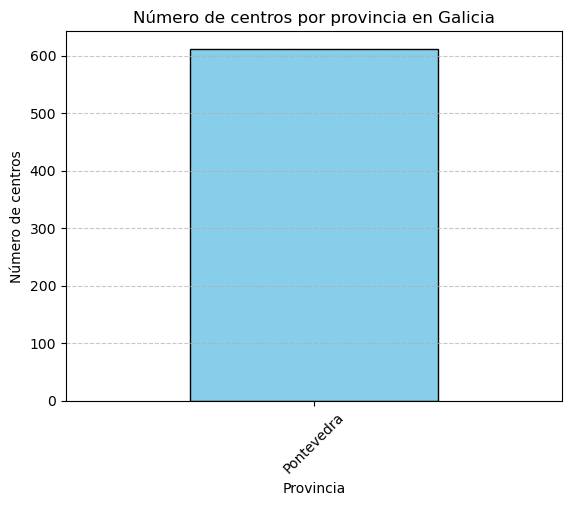

In [9]:
# 1️⃣ Contar centros por provincia
conteo = df['Provincia'].value_counts()

# 2️⃣ Mostrar conteo en pantalla
print("Número de centros por provincia:")
print(conteo)

# 3️⃣ Representar en una gráfica de barras
conteo.plot(kind='bar', color='skyblue', edgecolor='black')

# 4️⃣ Personalizar la gráfica
plt.title('Número de centros por provincia en Galicia')
plt.xlabel('Provincia')
plt.ylabel('Número de centros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5️⃣ Mostrar la gráfica
plt.show()

In [11]:
concello_seleccionado = input("Introduce el concello: ") # como meter datos por teclado 
centros_vigo = df[df['Concello'] == concello_seleccionado] # filtrar las filas sea vigo
display(centros_vigo)
numero = df.groupby("Concello").count() #cuento por concello
display(numero)
otra_forma_contar= df.groupby("Concello").size().reset_index(name="numerocentros")
display(otra_forma_contar)

Introduce el concello:  Vigo


,Nome,Enderezo,Concello,Provincia,Cód. postal,Teléfono,Tipo de centro,COORDENADA_X,COORDENADA_Y,TITULARIDADE,ENSINO_CONCERTADO,DEPENDENTE
Código,,,,,,,,,,,,
36000867,EMUSPR Atlántida,"Rúa dos Canteiros, 53 - Matama",Vigo,Pontevedra,36213,986236389,EMUSPR,42.201221,-8.733916,Privada,Non,Non
36009925,CPR Plurilingüe Amor de Dios,Avenida de Europa 21,Vigo,Pontevedra,36212,986240669,CPR,42.216103,-8.758529,Privada,Si,Non
36009949,CEIP Plurilingüe Javier Sensat,"Rúa Javier Sensat, 8 (O Castañal)",Vigo,Pontevedra,36208,886120243,CEIP,42.220936,-8.762107,Pública,Non,Si
36009962,CEIP Otero Pedrayo,"Rúa Ramiro Pascual, 9 (Carneiras)",Vigo,Pontevedra,36213,886120257,CEIP,42.195194,-8.718772,Pública,Non,Si
36009974,CEIP de Coutada-Beade,"Camiño do Alen, 6 (As Coutadas)",Vigo,Pontevedra,36312,886111196,CEIP,42.192539,-8.701804,Pública,Non,Si
...,...,...,...,...,...,...,...,...,...,...,...,...
36025037,CPR Plurilingüe Las Acacias-Montecastelo,Rúa Doctor Paz Pardo 84,Vigo,Pontevedra,36214,986412488,CPR,42.212791,-8.694459,Privada,Si,Non
36025104,CEEPR Amencer-Aspace,"Camiño Arieiro (polígono 102, parcela 700) 144",Vigo,Pontevedra,36214,986597500,CEEPR,0.000000,0.000000,Privada,Si,Non
36025116,EMUSPR Escola de Música Ateneo Musical de Bemb...,Alameda do Torreiro s/n - Bembrive s/n,Vigo,Pontevedra,36313,,EMUSPR,0.000000,0.000000,Privada,Non,Non


,Nome,Enderezo,Provincia,Cód. postal,Teléfono,Tipo de centro,COORDENADA_X,COORDENADA_Y,TITULARIDADE,ENSINO_CONCERTADO,DEPENDENTE
Concello,,,,,,,,,,,
A Cañiza,3,3,3,3,3,3,3,3,3,3,3
A Estrada,12,12,12,12,12,12,12,12,12,12,12
A Guarda,9,9,9,9,9,9,9,9,9,9,9
A Illa de Arousa,4,4,4,4,4,4,4,4,4,4,4
A Lama,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
Vigo,171,171,171,171,171,171,171,171,171,171,171
Vila de Cruces,5,5,5,5,5,5,5,5,5,5,5
Vilaboa,4,4,4,4,4,4,4,4,4,4,4


,Concello,numerocentros
0,A Cañiza,3
1,A Estrada,12
2,A Guarda,9
3,A Illa de Arousa,4
4,A Lama,2
...,...,...
56,Vigo,171
57,Vila de Cruces,5
58,Vilaboa,4
59,Vilagarcía de Arousa,25


5. **Ficheros parquet**

 Formato de archivo columnar diseñado especialmente para almacenar y procesar grandes volúmenes de datos de manera eficiente, sobre todo en entornos Big Data como Apache Hadoop, Spark

In [16]:
import pandas as pd
import pyarrow.parquet as pq
df_read = pd.read_parquet('iris.parquet')
display(df_read)

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [17]:
filtered_df = df_read[df_read['sepal_length'] > 7]
display(filtered_df)
print("Número de plantas:" ,  len(filtered_df))

,id,sepal_length,sepal_width,petal_length,petal_width,species
102,103,7.1,3.0,5.9,2.1,virginica
105,106,7.6,3.0,6.6,2.1,virginica
107,108,7.3,2.9,6.3,1.8,virginica
109,110,7.2,3.6,6.1,2.5,virginica
117,118,7.7,3.8,6.7,2.2,virginica
118,119,7.7,2.6,6.9,2.3,virginica
122,123,7.7,2.8,6.7,2.0,virginica
125,126,7.2,3.2,6.0,1.8,virginica
129,130,7.2,3.0,5.8,1.6,virginica
130,131,7.4,2.8,6.1,1.9,virginica


Número de plantas: 12


<span style="color:red">**Ejercicio**</span>. Calcula la media y la desviación standard de cada valor numérico

Ayuda: ===>  *media_altura = df["altura"].mean()*  

In [26]:
medias= df_read[["sepal_length", "sepal_width", "petal_length", "petal_width"]].mean()
display(round(medias),2)
desviacion= df_read[["sepal_length", "sepal_width", "petal_length", "petal_width"]].std()
display(round(desviacion), 2)

sepal_length    6.0
sepal_width     3.0
petal_length    4.0
petal_width     1.0
dtype: float64

2

sepal_length    1.0
sepal_width     0.0
petal_length    2.0
petal_width     1.0
dtype: float64

2

6. **Ficheros geojson**

Un GeoJSON es un tipo especial de JSON (JavaScript Object Notation) usado para almacenar datos geográficos: puntos, líneas, polígonos, países, carreteras, zonas, etc.

Es un formato abierto y **basado en texto**, que puedes abrir en cualquier editor o en el navegador.

In [28]:
import pandas as pd
import json

# Ruta al archivo GeoJSON
ruta_geojson = 'starbucks.geojson'

# Carga el GeoJSON en un DataFrame de Pandas
with open(ruta_geojson, 'r') as f:
    data = json.load(f)

# Extrae las características del GeoJSON
features = data['features']

# Crea una lista de diccionarios con la información necesaria
store_data = []
for feature in features:
    properties = feature['properties']
    geometry = feature['geometry']
    if properties.get('Country') == 'ES' and properties.get('City') == 'Sevilla':
     store_data.append({
        'State/Province': properties.get('State/Province', None),
        'City': properties.get('City', None),
        'Store Name': properties.get('Store Name', None),
        'Latitude': geometry['coordinates'][1] if geometry['type'] == 'Point' else None,
        'Longitude': geometry['coordinates'][0] if geometry['type'] == 'Point' else None
    })
# Crea un DataFrame de Pandas a partir de la lista de diccionarios
df = pd.DataFrame(store_data)

# Muestra el contenido del DataFrame
print(df)

# Muestra el número total de tiendas después del filtro
numero_de_tiendas = df.shape[0]
print("Número total de tiendas: ", numero_de_tiendas)

  State/Province     City           Store Name  Latitude  Longitude
0             AN  Sevilla           La Campana     37.39      -6.00
1             AN  Sevilla  Av. Constitucion 11     37.39      -5.99
2             AN  Sevilla  Avd Constitucion 36     37.38      -5.99
3             AN  Sevilla         Puerta Jerez     37.38      -5.99
Número total de tiendas:  4


Otra forma

In [29]:
import geopandas as gpd    #instalar geopandas

# Ruta al archivo GeoJSON
ruta_geojson = 'starbucks.geojson'

# Carga el GeoJSON en un GeoDataFrame de GeoPandas
gdf = gpd.read_file(ruta_geojson)

display(gdf.info())

# Filtra los datos para incluir solo tiendas en España (Country: 'ES') y Valencia (City: 'Valencia')
filtered_gdf = gdf[(gdf['Country'] == 'ES') & (gdf['City'] == 'Valencia')]

# Selecciona solo las columnas de interés
seleccion_columns = ['Country', 'City', 'geometry']

# Crea un nuevo GeoDataFrame con las columnas seleccionadas
resultado_gdf = filtered_gdf[seleccion_columns]

# Muestra el contenido del GeoDataFrame resultante
print(resultado_gdf)

numero_de_tiendas = len(filtered_gdf)
print("Número total de tiendas: ", numero_de_tiendas)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25599 entries, 0 to 25598
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   City            25599 non-null  object  
 1   Country         25599 non-null  object  
 2   Ownership Type  25599 non-null  object  
 3   State/Province  25599 non-null  object  
 4   Store Name      25599 non-null  object  
 5   Store Number    25599 non-null  object  
 6   geometry        25599 non-null  geometry
dtypes: geometry(1), object(6)
memory usage: 1.4+ MB


None

     Country      City             geometry
5113      ES  Valencia  POINT (-0.38 39.48)
5114      ES  Valencia  POINT (-0.38 39.47)
5115      ES  Valencia  POINT (-0.37 39.47)
5116      ES  Valencia  POINT (-0.38 39.47)
Número total de tiendas:  4


In [30]:
import folium  # Importa la librería Folium para crear mapas interactivos

# Crear un mapa centrado en latitud 40 y longitud 0 (centro aproximado del Atlántico)
# con un nivel de zoom inicial de 2 (visión global)
m = folium.Map(location=[40, 0], zoom_start=2)

# Iterar sobre una muestra de 500 filas del GeoDataFrame gdf
# gdf.sample(500) toma 500 tiendas aleatorias para no sobrecargar el mapa
for _, row in gdf.sample(500).iterrows():
    # Crear un marcador en el mapa para cada tienda
    folium.Marker(
        # Usar las coordenadas del GeoDataFrame
        location=[row.geometry.y, row.geometry.x],  
        # Crear un popup que muestre el nombre de la tienda, ciudad y país
        popup=f"{row['Store Name']} ({row['City']}, {row['Country']})"
    ).add_to(m)  # Agregar el marcador al mapa

# Guardar el mapa interactivo en un archivo HTML
m.save("starbucks_map.html")


<span style="color:red">**Ejercicio**</span>. 

Calcula el país con más tiendas starbucks.

Crea un mapa solo con las tiendas de España-

¿Qué porcentaje de las tiendas son company-owned frente a licensed?


Existen otros ficheros pero menos importantes:

**shapefiles**. Relacionado con geolocalización para más antiguos.

**caxis**. Utilizados en el ámbito industrial, IoT, clima, simulaciones. Interesante para proyectos con sensores.